In [193]:
#1 Завдання
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns


# Завантажуємо дані
df = pd.read_csv('Stars.csv')

In [74]:
# Виведення назв колонок і розміру датасету
print("Назви колонок:", df.columns)
print("Розмір датасета:", df.shape)

Назви колонок: Index(['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class', 'Type'], dtype='object')
Розмір датасета: (240, 7)


In [195]:
# Перетворення категоріальних змінних за допомогою LabelEncoder
label_encoders = {}
categorical_cols = ['Color', 'Spectral_Class', 'Type']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Зберігаємо LabelEncoder для кожної колонки
    
    # Виводимо розшифровку значень
    if col == 'Color':
        print(f"Розшифровка для '{col}':")
        for idx, class_ in enumerate(le.classes_):
            print(f"  {idx}: {class_}:")  # Оригінальні значення для Color
    if col=='Spectral_Class':
        print(f"Розшифровка для '{col}':")
        for idx, class_ in enumerate(le.classes_):
            print(f"  {idx}: {class_}:")  # Оригінальні значення для Color
    if col=='Type':
        print(f"Розшифровка для '{col}':")
        for idx, class_ in enumerate(le.classes_):
            print(f"  {idx}: {class_}")  # Залишаємо як є для Type

Розшифровка для 'Color':
  0: Blue:
  1: Blue White:
  2: Blue white:
  3: Blue-White:
  4: Blue-white:
  5: Orange:
  6: Orange-Red:
  7: Pale yellow orange:
  8: Red:
  9: White:
  10: White-Yellow:
  11: Whitish:
  12: Yellowish:
  13: Yellowish White:
  14: white:
  15: yellow-white:
  16: yellowish:
Розшифровка для 'Spectral_Class':
  0: A:
  1: B:
  2: F:
  3: G:
  4: K:
  5: M:
  6: O:
Розшифровка для 'Type':
  0: 0
  1: 1
  2: 2
  3: 3
  4: 4
  5: 5


In [118]:
# Нормалізація числових значень
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [122]:
# Виділимо дані без цільової змінної для PCA і t-SNE
X = df.drop(columns=['Type'])
y = df['Type']

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

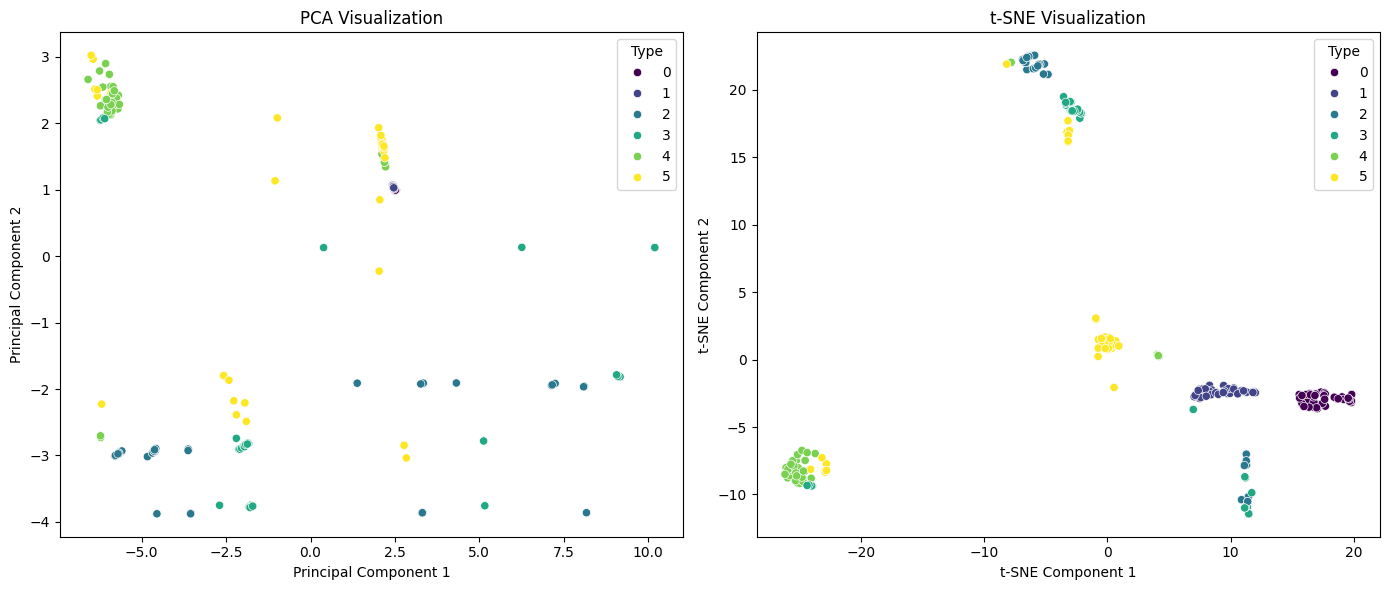

In [123]:
# Візуалізація PCA
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', legend='full')
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Візуалізація t-SNE
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='viridis', legend='full')
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()

In [ ]:
#2 Завдання

In [124]:
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Функція для квантування зображення
def quantize_image(image, k):
    # Перетворення зображення в двовимірний масив пікселів (RGB)
    pixels = np.array(image).reshape(-1, 3)
    
    # Використання k-means для квантування
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pixels)
    
    # Замінюємо кольори пікселів центроїдами кластерів
    new_pixels = kmeans.cluster_centers_[kmeans.labels_]
    new_image = new_pixels.reshape(image.size[1], image.size[0], 3).astype(np.uint8)
    
    return Image.fromarray(new_image)


In [191]:
# Завантаження зображення через Pillow
image_path = '8.jpg'  # Вкажіть шлях до вашого зображення
image = Image.open(image_path)

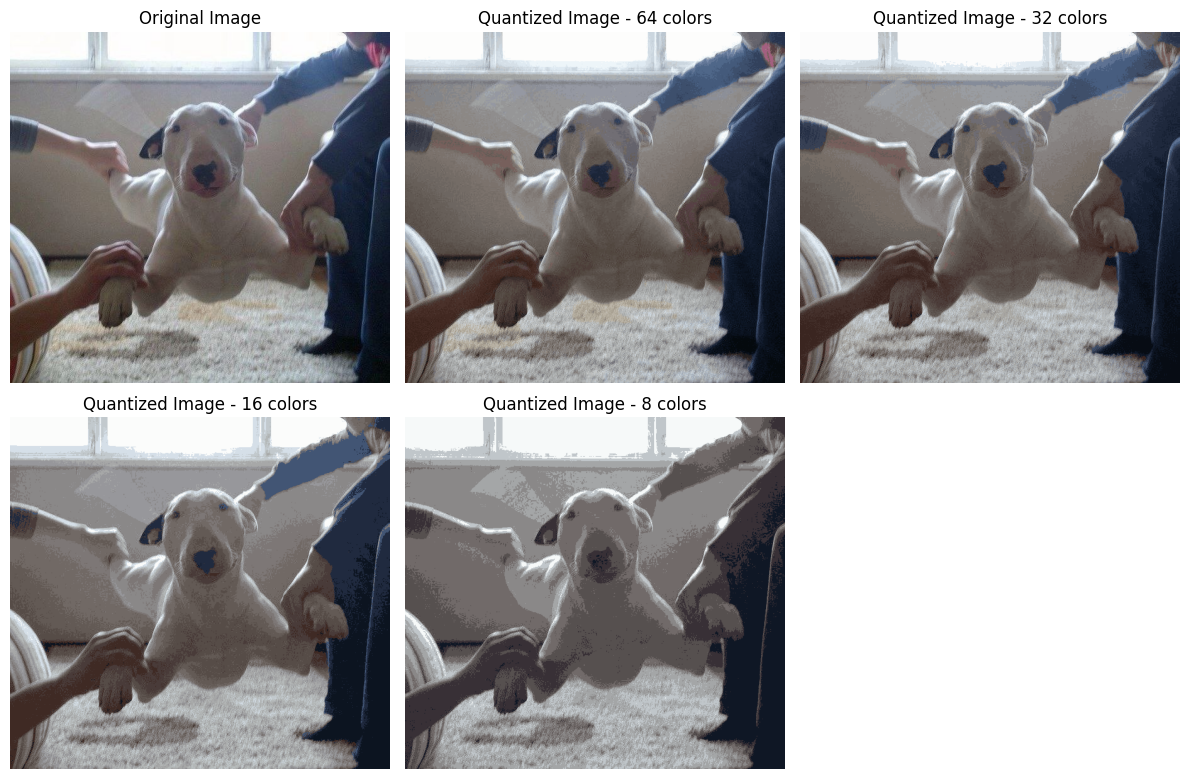

In [192]:
# Візуалізація оригінального зображення та квантування для різних рівнів
levels = [64, 32, 16, 8]

plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

for i, k in enumerate(levels):
    quantized_image = quantize_image(image, k)
    plt.subplot(2, 3, i+2)
    plt.imshow(quantized_image)
    plt.title(f'Quantized Image - {k} colors')
    plt.axis('off')

plt.tight_layout()
plt.show()


Навчання моделі для 64 кольорів
Модель навчена за 0.052 секунд.
Прогнозування міток для 64 кольорів
Прогноз завершено за 0.018 секунд.

Навчання моделі для 32 кольорів
Модель навчена за 0.035 секунд.
Прогнозування міток для 32 кольорів
Прогноз завершено за 0.014 секунд.

Навчання моделі для 16 кольорів
Модель навчена за 0.028 секунд.
Прогнозування міток для 16 кольорів
Прогноз завершено за 0.010 секунд.

Навчання моделі для 8 кольорів
Модель навчена за 0.027 секунд.
Прогнозування міток для 8 кольорів
Прогноз завершено за 0.009 секунд.


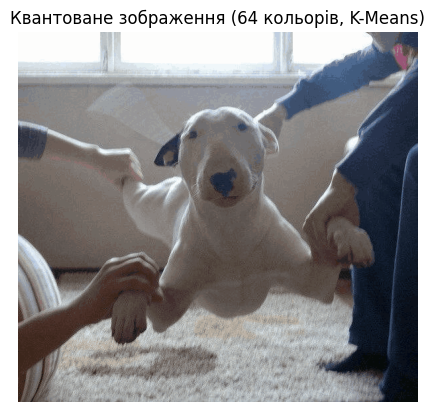

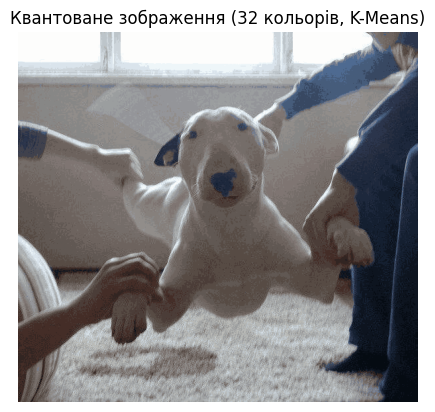

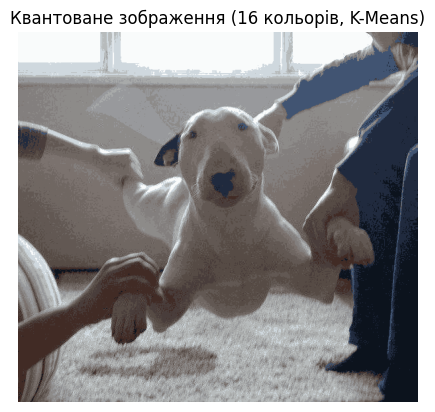

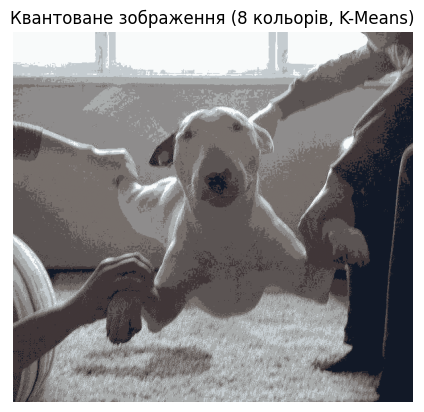

In [2]:
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from PIL import Image

# Відновлення зображення з кластерних центрів і міток
def reconstruct_image(centroids, labels, width, height):
    return centroids[labels].reshape(width, height, -1)

# Завантаження зображення та нормалізація значень пікселів
image_path = '8.jpg'  # Вкажіть шлях до свого зображення
image = Image.open(image_path)
image = np.array(image) / 255.0  # Перетворення пікселів у діапазон [0, 1]

# Збереження початкових розмірів і перетворення зображення в масив пікселів
width, height, depth = image.shape
pixels = image.reshape(-1, depth)

# Визначення різних кількостей кольорів для квантізації
color_levels = [64, 32, 16, 8]

for colors in color_levels:
    print(f"\nНавчання моделі для {colors} кольорів")
    start_time = time.time()
    
    # Вибір випадкової підвибірки пікселів для ефективного навчання моделі
    sample_pixels = shuffle(pixels, random_state=42, n_samples=1000)
    kmeans = KMeans(n_clusters=colors, random_state=42).fit(sample_pixels)
    print(f"Модель навчена за {time.time() - start_time:.3f} секунд.")

    # Прогнозування міток кольорів для всіх пікселів
    print(f"Прогнозування міток для {colors} кольорів")
    start_time = time.time()
    pixel_labels = kmeans.predict(pixels)
    print(f"Прогноз завершено за {time.time() - start_time:.3f} секунд.")

    # Відтворення та відображення зображення з квантованими кольорами
    plt.figure()
    plt.axis("off")
    plt.title(f"Квантоване зображення ({colors} кольорів, K-Means)")
    plt.imshow(reconstruct_image(kmeans.cluster_centers_, pixel_labels, width, height))

plt.show()

In [194]:
#3 Завдання


In [3]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Завантаження даних
data = pd.read_csv('Emotion_classify_Data.csv', encoding='latin-1')
data = data[['Comment', 'Emotion']]
data.columns = ['text','label']

data.head

<bound method NDFrame.head of                                                    text  label
0     i seriously hate one subject to death but now ...   fear
1                    im so full of life i feel appalled  anger
2     i sit here to write i start to dig out my feel...   fear
3     ive been really angry with r and i feel like a...    joy
4     i feel suspicious if there is no one outside l...   fear
...                                                 ...    ...
5932                 i begun to feel distressed for you   fear
5933  i left feeling annoyed and angry thinking that...  anger
5934  i were to ever get married i d have everything...    joy
5935  i feel reluctant in applying there because i w...   fear
5936  i just wanted to apologize to you because i fe...  anger

[5937 rows x 2 columns]>

In [4]:
# Передобробка тексту
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print(stop_words)

def preprocess_text(text):
    # Видалення пунктуації і приведення до нижнього регістру
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Видалення стоп-слів
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

data['text_clean'] = data['text'].apply(preprocess_text)
data['text_clean']

{"you'd", 'until', 'than', 'the', 'itself', "mustn't", 'had', 'a', "haven't", 'with', "doesn't", 'out', 'further', 'mightn', 'both', 'wouldn', 'll', 'by', 'my', 'against', 'they', 'myself', 'our', 'are', 'don', 'too', 'shouldn', "needn't", 'has', 'for', 'how', 'him', 'it', "she's", 'were', 'theirs', 'under', 'so', 'am', 'after', 'she', 'there', 've', 'more', "hadn't", 'himself', 'some', 'm', 'his', 'other', 'above', 'any', 'then', 'will', 'about', 'own', 'an', 'to', 'me', 'does', 'just', "weren't", "you've", 'yours', 'here', 'themselves', 'should', "you're", 'hers', "should've", 'of', 'through', 'being', 'off', 'yourselves', 'whom', 'down', 'those', 'before', 'again', 'once', 'up', "it's", 'having', "didn't", "won't", "that'll", 'each', 'but', 'doesn', 'i', 'isn', 'won', 'them', 're', 'couldn', 'if', 'this', 'ours', 'not', 'd', "you'll", "wasn't", 'now', 'as', 'herself', 'very', 'or', 'weren', 'doing', 'wasn', 'hadn', 'her', 'which', 'because', 'he', 'between', 'when', 'ourselves', 'be

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0       seriously hate one subject death feel reluctan...
1                              im full life feel appalled
2       sit write start dig feelings think afraid acce...
3       ive really angry r feel like idiot trusting fi...
4       feel suspicious one outside like rapture happe...
                              ...                        
5932                                begun feel distressed
5933    left feeling annoyed angry thinking center stu...
5934    ever get married everything ready offer got to...
5935    feel reluctant applying want able find company...
5936           wanted apologize feel like heartless bitch
Name: text_clean, Length: 5937, dtype: object

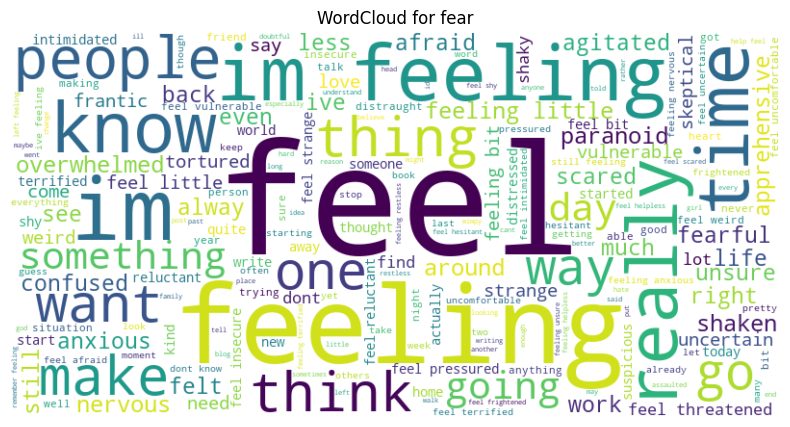

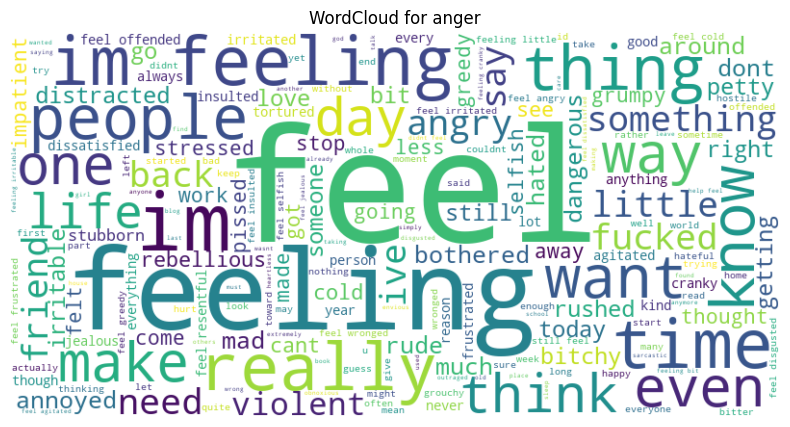

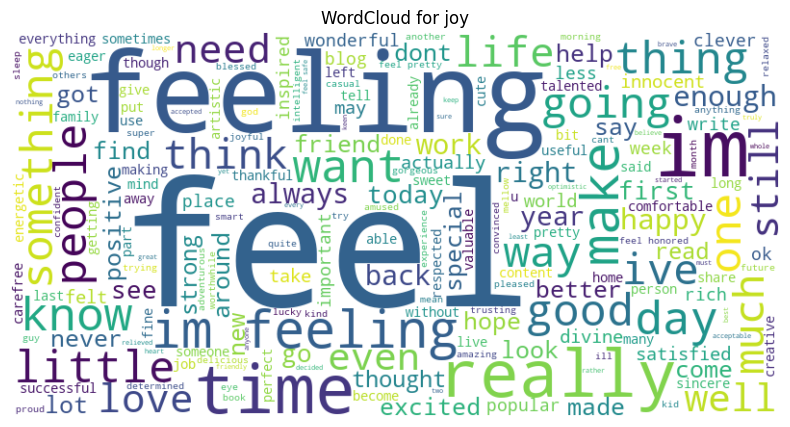

In [5]:
# Візуалізація WordCloud для кожного класу
for label in data['label'].unique():
    subset = data[data['label'] == label]
    text = ' '.join(subset['text_clean'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {label}')
    plt.show()

In [6]:
# Преобробка даних: заміна міток класів на числові
data['label'] = data['label'].map({'joy': 0, 'anger': 1, 'fear': 2})

# Векторизація тексту
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data['text_clean'])
y = data['label']

# Розбиття даних на тренувальні та тестові набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Навчання класифікатора
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Прогнозування
y_pred = classifier.predict(X_test)

# Оцінка якості
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=['joy', 'anger', 'fear']))

Accuracy: 0.9135802469135802
              precision    recall  f1-score   support

         joy       0.92      0.90      0.91       568
       anger       0.90      0.94      0.92       600
        fear       0.92      0.90      0.91       614

    accuracy                           0.91      1782
   macro avg       0.91      0.91      0.91      1782
weighted avg       0.91      0.91      0.91      1782

